In [1]:
from PIL import Image

from keras import models 
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from functools import reduce

import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.applications.xception import (Xception, preprocess_input, decode_predictions)

Using TensorFlow backend.


In [39]:
folderpath = '../Keras/data/train'
img = 'Image4.jpg'
image_size = (150, 150)


In [40]:
# Create and model and load weights

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(81))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.load_weights("first_try.h5")


# datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)    

In [63]:
# Refactor above steps into reusable function
def find_label(index):
    return [v for v in os.listdir(folderpath) if v != '.DS_Store'][index]


def compare(a, t):
    i1, v1 = a
    i2, v2 = t
    if v2 > v1:
        return t
    else:
        return a

def predict(image_path, model):
    """Use Xception to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    #print(x.shape)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    test = model.predict_classes(x, verbose=1)
    print(predictions)
    print(predictions.shape)
    plt.imshow(img)
    
    index = reduce(compare, enumerate(predictions))[0]
    print(index)
    return find_label(60)




1/1 [==============================] - 0s 10ms/step
[[  6.31417834e-06   1.64788094e-06   1.59395961e-06   3.22356163e-06
    8.53182200e-08   6.72711531e-06   8.53888014e-06   2.59525962e-07
    2.28021364e-07   1.19707671e-04   4.14479695e-09   3.59792502e-05
    3.17153826e-05   4.49757342e-09   1.31981051e-06   1.67094448e-04
    7.09112129e-08   2.44602893e-06   6.29475244e-06   5.69099043e-08
    2.56446265e-06   1.46973150e-06   2.31247004e-08   1.16922934e-06
    2.80283780e-06   5.57498012e-08   7.53116353e-07   9.45296269e-05
    6.99289194e-06   2.83803711e-05   1.30830391e-04   1.56630654e-06
    2.99614271e-06   9.04885819e-05   1.08316442e-06   5.66203084e-07
    1.07584383e-04   1.17514060e-06   1.12568043e-04   1.23953869e-04
    2.15600608e-06   3.94518393e-05   6.34948304e-03   1.01092098e-06
    1.05627143e-04   2.18492772e-07   1.09258217e-05   4.50651032e-06
    3.09090719e-05   2.18554669e-05   1.86989809e-07   5.97348320e-04
    1.14687464e-06   7.29964959e-05   

'3DRE'

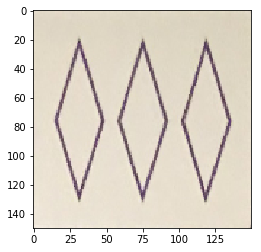

In [64]:
predict(img,model)

In [60]:


def compare(a, t):
    i1, v1 = a
    i2, v2 = t
    if v2 > v1:
        return t
    else:
        return a

In [57]:
a = [1,2,3]
b = [2,3,4]

In [58]:
compare(a,b)

ValueError: too many values to unpack (expected 2)